In [1]:
import torch
print(torch.__version__)

2.2.1


In [2]:
print(torch.cuda.is_available())

False


In [3]:
import numpy as np
tensor_0d = torch.tensor(1) # scalar value

In [5]:
tensor_0d.shape

torch.Size([])

In [6]:
tensor_1d = torch.tensor([1,2,3]) # 1d from list like a series
tensor_1d.shape
# 1d however it shows its size

torch.Size([3])

In [7]:
tensor_2d = torch.tensor([[1,2],[3,4]])
tensor_2d.shape 

torch.Size([2, 2])

In [10]:
tensor_3d = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]],[[2,3,4],[3,4,5],[5,6,7]]])
tensor_3d.shape

torch.Size([2, 3, 3])

In [11]:
tensor_3d

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[2, 3, 4],
         [3, 4, 5],
         [5, 6, 7]]])

In [12]:
ary_3d = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
tensor_3d_2 = torch.tensor(ary_3d) # copies memory
tensor_3d_3 = torch.from_numpy(ary_3d) # shares the memory


In [14]:
ary_3d[0,0,0]=-999 # i,j,k in the dimension here i can be 0,1 j,k 0,1,2
tensor_3d_2

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [15]:
tensor_3d_3

tensor([[[-999,    2],
         [   3,    4]],

        [[   5,    6],
         [   7,    8]]])

In [17]:
tensor_2d = torch.tensor([[1,2,3],[4,5,6]])
print(tensor_2d.shape)
tensor_2d


torch.Size([2, 3])


tensor([[1, 2, 3],
        [4, 5, 6]])

In [18]:
tensor_2d.reshape(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [19]:
tensor_2d.reshape(-1) # flatten 

tensor([1, 2, 3, 4, 5, 6])

In [22]:
tensor_2d.reshape(1,6)

tensor([[1, 2, 3, 4, 5, 6]])

In [23]:
tensor_2d.reshape(6,1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [24]:
tensor_2d.view(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [25]:
tensor_2d.view(-1)

tensor([1, 2, 3, 4, 5, 6])

## diff between view and reshape
- view requieres contiguous tensor 
- reshape is flexible, copies data in memory



In [27]:
tensor_2d.matmul(tensor_2d.T)

tensor([[14, 32],
        [32, 77]])

In [28]:
tensor_2d @ tensor_2d.T # @ refers as matrix multiplication

tensor([[14, 32],
        [32, 77]])

## using torch as a computation graph

In [29]:
import torch.nn.functional as F

y = torch.tensor([1.0])  # true label
x1 = torch.tensor([1.1]) # input feature
w = torch.tensor([2.2])  # weight param
b = torch.tensor([0.0])  # bias 

model = torch.sigmoid(x1 * w + b)
loss = F.binary_cross_entropy(model,y)

print(loss)

tensor(0.0852)


In [30]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])                     # true label
x1 = torch.tensor([1.1])                    # input feature
w = torch.tensor([2.2],requires_grad=True)  # weight param
b = torch.tensor([0.0],requires_grad=True)  # bias 

model = torch.sigmoid(x1 * w + b)
loss = F.binary_cross_entropy(model,y)

print(loss)

grad_L_w = grad(loss, w, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w,grad_L_b)

tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward0>)
(tensor([-0.0898]),) (tensor([-0.0817]),)


In [31]:
loss.backward() # automatic calulcation of grad if required_grad=True added for the weight parameter
print(w.grad,b.grad)

tensor([-0.0898]) tensor([-0.0817])


In [ ]:
# next implement linear regression
# logistic regression
# add callback functions 
# create simple MLP
# use object notation forward and backward
# create typical training loop
# use of different optimizer vs manual runs

In [4]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,num_input,num_output):
        super().__init__() # inherit from the parent class
        self.layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_input, 30), 
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_output),
        )

    def forward(self,x):
        # forward pass of the neural network
        # output of the last layer is called logits
        # logits are the raw scores from the neural network
        logits = self.layers(x)
        return logits
        

In [5]:
model = NeuralNetwork(50,3)
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [6]:
# we used sequential to define the layers
# we just need to define self.layers = Sequential(...) instead of defining each layer separately


In [7]:
#total parameter counts
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')

2,213 total parameters.


In [8]:
# each param for which requires_grad=True is counted as trainable parameter

In [10]:
print(model.layers[0].weight.shape)
print(model.layers[0].bias.shape)
print(model.layers[0].weight)

torch.Size([30, 50])
torch.Size([30])
Parameter containing:
tensor([[-0.0264, -0.0656, -0.0044,  ...,  0.1317,  0.1320, -0.0301],
        [ 0.0546,  0.0949, -0.0671,  ..., -0.0488,  0.0119, -0.1121],
        [ 0.0757, -0.0017,  0.1341,  ...,  0.1060,  0.0752, -0.0343],
        ...,
        [-0.0183, -0.0792, -0.0873,  ..., -0.0257,  0.0470,  0.0391],
        [ 0.0802, -0.0648, -0.1215,  ..., -0.0139, -0.0753, -0.0386],
        [-0.0655,  0.1242, -0.0064,  ..., -0.0956, -0.0372,  0.0789]],
       requires_grad=True)


In [11]:
# during the model training model is initialized with small random numbers
# this is desired to break the symmetry of the model
# however we can also initialize the model with some specific initialization
# we can also use the pretrained model


In [14]:
torch.manual_seed(123)
model = NeuralNetwork(50,3)
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [17]:
torch.manual_seed(123)
X = torch.rand(size=(1,50))
out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


In [18]:
# here output is grad function AddmmBackward0
# which means addmm == matrix multiplication and addition
# that means model was running with backpropagation condition on

In [19]:
# if we want to run the model without backpropagation
# we can use torch.no_grad() context manager
with torch.no_grad():
    out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In [20]:
# its a common practice in pytorch to return the output of the last layer without activation function (non linearity)
# this is because the loss function we use in pytorch like cross entropy, mse, etc 
# they have the activation function built in them
# the reason is numerical stability and efficiency

In [21]:
with torch.no_grad():
    out = model(X)
    out = torch.softmax(out,dim=1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


## Efficient Data Loaders

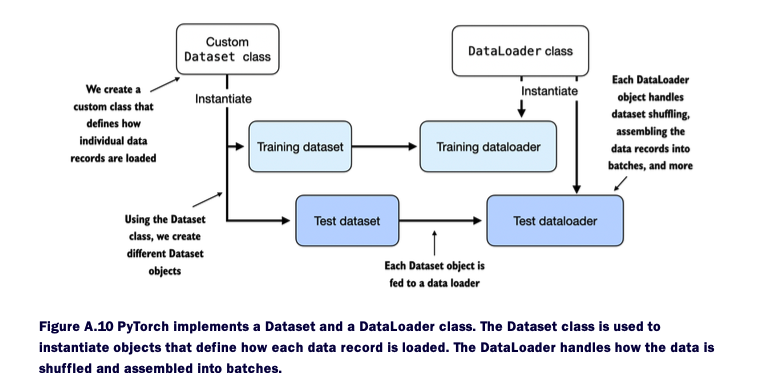

In [22]:
X_train = torch.tensor([
    [-1.2,3.1],
    [-0.9,2.9],
    [-0.5,2.6],
    [0.0,2.4],
    [0.4,2.3],
    [0.8,2.1],
    [1.3,2.0],
    [1.7,1.8],
    [2.2,1.7],
    [2.6,1.5]
])

y_train = torch.tensor([0,0,0,0,0,1,1,1,1,1])

X_test = torch.tensor([
    [-1.0,3.0],
    [0.0,2.5],
    [1.0,2.0],
    [2.0,1.5]
])

y_test = torch.tensor([0,0,1,1])
# pytorch requiers the label to start from 0


In [29]:
from torch.utils.data import Dataset, DataLoader

class ToyDataset(Dataset):
    def __init__(self,X,y):
        self.features = X
        self.lables = y

    def __len__(self):
        # return the number of samples
        return self.lables.shape[0]

    def __getitem__(self,idx):
        one_x = self.features[idx]
        one_y = self.lables[idx]
        return one_x, one_y
    
train_ds = ToyDataset(X_train,y_train)
test_ds = ToyDataset(X_test,y_test)


In [30]:
# the main components of the dataset class are __init__, __len__, __getitem__
# __init__ is used to initialize the dataset we need to access later, like features, labels, file paths, database connections, etc
# __len__ is used to return the number of samples in the dataset
# __getitem__ is used to return the sample at the given index, returning only one sample at a time
# the main advantage of using the dataset class is that we can use the dataloader class

In [31]:
print(len(train_ds))

10


In [32]:
torch.manual_seed(123)
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

In [33]:
for idx, (x, y) in enumerate(train_loader): 
    print(f'batch {idx+1}:\n{x}\n{y}\n')


batch 1:
tensor([[ 2.2000,  1.7000],
        [-0.5000,  2.6000]])
tensor([1, 0])

batch 2:
tensor([[1.3000, 2.0000],
        [1.7000, 1.8000]])
tensor([1, 1])

batch 3:
tensor([[-1.2000,  3.1000],
        [ 0.0000,  2.4000]])
tensor([0, 0])

batch 4:
tensor([[ 2.6000,  1.5000],
        [-0.9000,  2.9000]])
tensor([1, 0])

batch 5:
tensor([[0.8000, 2.1000],
        [0.4000, 2.3000]])
tensor([1, 0])



In [34]:
# if last batch of the dataset is smaller than the batch size then we can use drop_last=True
# the reason is it can disturb the convergence of the model during the training process

In [35]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    drop_last=True
)

for idx, (x, y) in enumerate(train_loader):
    print(f'batch {idx+1}:\n{x}\n{y}\n')

batch 1:
tensor([[0.8000, 2.1000],
        [2.6000, 1.5000]])
tensor([1, 1])

batch 2:
tensor([[-0.5000,  2.6000],
        [ 1.7000,  1.8000]])
tensor([0, 1])

batch 3:
tensor([[2.2000, 1.7000],
        [1.3000, 2.0000]])
tensor([1, 1])

batch 4:
tensor([[ 0.4000,  2.3000],
        [-1.2000,  3.1000]])
tensor([0, 0])

batch 5:
tensor([[-0.9000,  2.9000],
        [ 0.0000,  2.4000]])
tensor([0, 0])



In [36]:
# num workers is used to load the data in parallel
# it is used to load the data in the background while the model is training
# it is used to speed up the data loading process

In [41]:
# training code

import torch.nn.functional as F

torch.manual_seed(123)
model = NeuralNetwork(num_input=2,num_output=2)
# we let the optimzer know which parameters to update
optimizer = torch.optim.SGD(model.parameters(),lr=0.5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):
        
        logitts = model(features)
        loss = F.cross_entropy(logitts,labels)
        # zero the gradients from the previous iteration to avoid accumulation
        optimizer.zero_grad()
        # backpropagation
        loss.backward()
        # update the weights
        optimizer.step()

        ### LOGGING
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    model.eval()
    


Epoch [1/3], Step [1/5], Loss: 0.6353
Epoch [1/3], Step [2/5], Loss: 1.9268
Epoch [1/3], Step [3/5], Loss: 0.6825
Epoch [1/3], Step [4/5], Loss: 0.9803
Epoch [1/3], Step [5/5], Loss: 0.9094
Epoch [2/3], Step [1/5], Loss: 0.3534
Epoch [2/3], Step [2/5], Loss: 0.7903
Epoch [2/3], Step [3/5], Loss: 0.6837
Epoch [2/3], Step [4/5], Loss: 0.6578
Epoch [2/3], Step [5/5], Loss: 0.3624
Epoch [3/3], Step [1/5], Loss: 0.1160
Epoch [3/3], Step [2/5], Loss: 0.7622
Epoch [3/3], Step [3/5], Loss: 0.4312
Epoch [3/3], Step [4/5], Loss: 0.2533
Epoch [3/3], Step [5/5], Loss: 0.0317


In [40]:
#total parameter counts
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
# 2 *30 +30 + 30*20 + 20 +20*2+2 = 752

752 total parameters.


In [42]:
# model.train and model.eval are used to switch the model between training and evaluation mode
# model.train is used to enable the dropout, batch normalization, etc
# model.eval is used to disable the dropout, batch normalization, etc

In [43]:
model.eval()
with torch.no_grad():
    output = model(X_train)
print(output)

tensor([[ 5.8823, -6.0037],
        [ 5.0744, -5.1931],
        [ 3.9515, -4.0664],
        [ 2.7682, -2.8750],
        [ 1.7959, -1.8641],
        [ 0.4324, -0.4405],
        [-0.8325,  0.9021],
        [-1.1017,  1.1972],
        [-1.3618,  1.4822],
        [-1.5661,  1.7145]])


In [46]:
torch.set_printoptions(sci_mode=False)
probs = torch.softmax(output,dim=1)
print(probs)

tensor([[    1.0000,     0.0000],
        [    1.0000,     0.0000],
        [    0.9997,     0.0003],
        [    0.9965,     0.0035],
        [    0.9749,     0.0251],
        [    0.7053,     0.2947],
        [    0.1500,     0.8500],
        [    0.0912,     0.9088],
        [    0.0550,     0.9450],
        [    0.0362,     0.9638]])


In [47]:
predictions = torch.argmax(probs,dim=1)
print(predictions)

tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])


In [48]:
predictions = torch.argmax(output,dim=1)
print(predictions)

tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])


In [50]:
torch.sum(predictions == y_train) *100 / len(y_train)

tensor(90.)

In [57]:
def compute_accuracy(model,dataloader):
    model = model.eval()
    correct, total = 0,0
    for idx, (features, labels) in enumerate(dataloader):
        with torch.no_grad():
            logits = model(features)
        predictions = torch.argmax(logits,dim=1)
        correct += torch.sum(predictions == labels)
        total += len(labels)
    # return correct*100/total # this will return tensor
    return (correct*100/total).item() # this will return scalar

In [58]:
compute_accuracy(model,train_loader)

90.0

In [59]:
# saving the mdoel and loading the model
# we can save the model state_dict
torch.save(model.state_dict(),'model.pth')
# we can load the model state_dict
model2 = NeuralNetwork(num_input=2,num_output=2)
model2.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [60]:
torch.cuda.is_available()

False

In [64]:
# training code

import torch.nn.functional as F

torch.manual_seed(123)
model = NeuralNetwork(num_input=2,num_output=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

model = model.to(device)
# we let the optimzer know which parameters to update
optimizer = torch.optim.SGD(model.parameters(),lr=0.5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):
        features = features.to(device)
        labels = labels.to(device)

        logitts = model(features)
        loss = F.cross_entropy(logitts,labels)
        # zero the gradients from the previous iteration to avoid accumulation
        optimizer.zero_grad()
        # backpropagation
        loss.backward()
        # update the weights
        optimizer.step()

        ### LOGGING
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    model.eval()
    


Epoch [1/3], Step [1/5], Loss: 0.6353
Epoch [1/3], Step [2/5], Loss: 1.9268
Epoch [1/3], Step [3/5], Loss: 0.6825
Epoch [1/3], Step [4/5], Loss: 0.9803
Epoch [1/3], Step [5/5], Loss: 0.9094
Epoch [2/3], Step [1/5], Loss: 0.3534
Epoch [2/3], Step [2/5], Loss: 0.7903
Epoch [2/3], Step [3/5], Loss: 0.6837
Epoch [2/3], Step [4/5], Loss: 0.6578
Epoch [2/3], Step [5/5], Loss: 0.3624
Epoch [3/3], Step [1/5], Loss: 0.1160
Epoch [3/3], Step [2/5], Loss: 0.7622
Epoch [3/3], Step [3/5], Loss: 0.4312
Epoch [3/3], Step [4/5], Loss: 0.2533
Epoch [3/3], Step [5/5], Loss: 0.0317


In [65]:
a = torch.rand(100, 200) 
b = torch.rand(200, 300)
%timeit a@b

16.2 µs ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [66]:
a, b = a.to("mps"), b.to("mps") 
%timeit a @ b

23.4 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [67]:
# instead of pytorch we can use pytorch lightning
# pytorch lightning is a lightweight wrapper on top of pytorch

from pytorch_lightning import LightningModule, Trainer

class LightningNeuralNetwork(LightningModule):
    def __init__(self,num_input,num_output):
        super().__init__()
        self.model = NeuralNetwork(num_input,num_output)

    def forward(self,x):
        return self.model(x)

    def training_step(self,batch,batch_idx):
        x, y = batch
        logits = self.model(x)
        loss = F.cross_entropy(logits,y)
        return loss

    def configure_optimizers(self):
        return torch.optim.SGD(self.model.parameters(),lr=0.5)

In [70]:
trainer = Trainer(max_epochs=3)
model = LightningNeuralNetwork(num_input=2,num_output=2)
trainer.fit(model,train_loader,test_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/jshah/anaconda3/envs/pytorch/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
/Users/jshah/anaconda3/envs/pytorch/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
Missing logger folder: /Users/jshah/Documents/GitHub/til/pytorch/lightning_logs

  | Name  | Ty

Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 268.37it/s, v_num=0]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 212.30it/s, v_num=0]
